# Pytorch

Build and train a convolutional neural network (CNN) using PyTorch for image classification tasks. (CIFAR10 dataset)

## Import necessary libraries


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Define the device to be used (GPU is available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Liad and preprocess data

In [ ]:
# Transform to normalize the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle=True)

# Load the CIFAR-10 dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 64, shuffle=False)

100%|██████████| 170498071/170498071 [00:05<00:00, 29827265.53it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Define the CNN Model

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    # Convolutional layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding = 1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)

    # Pooling layer
    self.pool = nn.MaxPool2d(2, 2)

    # Fully connected layers
    self.fc1 = nn.Linear(128 * 4 * 4, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)

    # Dropout layer to prevent overfitting
    self.droput = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = self.pool(torch.relu(self.conv3(x)))

    # Flatten the output from covolutional layers
    x = x.view(-1, 128 * 4 * 4)

    # Fully connected layers with ReLU activations
    x = torch.relu(self.fc1(x))
    x = self.droput(x)
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)

    return x

## Define Loss Function and Optimizer

In [ ]:
# Instantiate the CNN model, move to GPU if available
model = CNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

## Train the Model

In [ ]:
import matplotlib.pyplot as plt

# Training the CNN with accuracy tracking
num_epochs = 10  # You can adjust this based on performance and hardware capacity
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print loss and accuracy every 100 mini-batches
        if i % 100 == 99:
            accuracy = 100 * correct / total
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 100:.4f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0

    # Track loss and accuracy after each epoch
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(accuracy)

print('Finished Training')


Epoch 1, Batch 100, Loss: 0.4419, Accuracy: 84.70%
Epoch 1, Batch 200, Loss: 0.4705, Accuracy: 84.18%
Epoch 1, Batch 300, Loss: 0.4485, Accuracy: 84.01%
Epoch 1, Batch 400, Loss: 0.4567, Accuracy: 83.97%
Epoch 1, Batch 500, Loss: 0.4925, Accuracy: 83.70%
Epoch 1, Batch 600, Loss: 0.4901, Accuracy: 83.52%
Epoch 1, Batch 700, Loss: 0.5069, Accuracy: 83.31%
Epoch 2, Batch 100, Loss: 0.4221, Accuracy: 85.00%
Epoch 2, Batch 200, Loss: 0.4450, Accuracy: 84.51%
Epoch 2, Batch 300, Loss: 0.4665, Accuracy: 84.29%
Epoch 2, Batch 400, Loss: 0.4272, Accuracy: 84.40%
Epoch 2, Batch 500, Loss: 0.4570, Accuracy: 84.31%
Epoch 2, Batch 600, Loss: 0.4395, Accuracy: 84.27%
Epoch 2, Batch 700, Loss: 0.4537, Accuracy: 84.19%
Epoch 3, Batch 100, Loss: 0.3964, Accuracy: 86.25%
Epoch 3, Batch 200, Loss: 0.4027, Accuracy: 85.86%
Epoch 3, Batch 300, Loss: 0.4074, Accuracy: 85.80%
Epoch 3, Batch 400, Loss: 0.4279, Accuracy: 85.47%
Epoch 3, Batch 500, Loss: 0.4314, Accuracy: 85.41%
Epoch 3, Batch 600, Loss: 0.413

## Test the Model

In [ ]:
correct = 0
total = 0

# No gradient calculation for testing
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)

    # Forward pass
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10,000 test images: 73.81%


## Plotting the training loss and accuracy

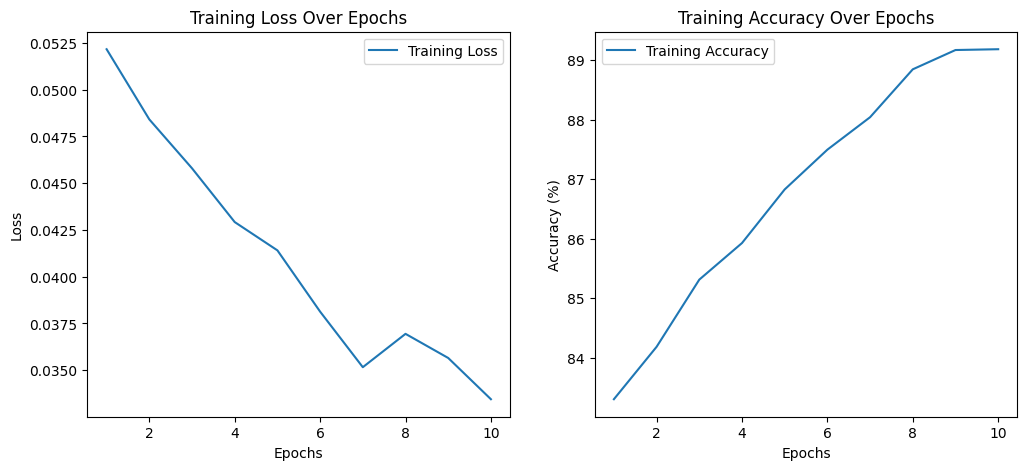

In [ ]:
# Plotting the training loss and accuracy
epochs = range(1, num_epochs + 1)

# Loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


## Save the Trained Model

In [ ]:
torch.save(model.state_dict(), 'cnn.cifar10.pth')
print('Model saved successfuly!')

Model saved successfuly!
